Task 01

In [33]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

from scipy.stats import entropy


# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [34]:
def calculate_probabilities(list_labels, uniq_labels):
 
    # A dictionary to store the probabilities
    probabilities = dict.fromkeys(uniq_labels, 0)
    
    # Total number of labels
    total_labels = len(list_labels)
    
    for label in uniq_labels:
        # Counting the number of times the label occurs in the list
        count = list_labels.count(label)
        
        # Calculating the probability of the label
        probability = count / total_labels
        
        # Storing the calculated probability in the dictionary
        probabilities[label] = probability
        
    return probabilities  

In [35]:
def calc_entropy_from_probabilities(list_probas):
    entropy_value = 0

    for proba in list_probas:
        # If the probability is not zero
        if proba != 0:
            entropy_value += -proba * np.log(proba)
     
    return entropy_value

In [36]:
def information_gain(old_entropy,new_entropies,count_items):
   
    
    overall_new_entropy = 0
    
    # Calculating the total number of items
    total_items = sum(count_items)
    
    for i in range(len(new_entropies)):
        # Calculating the proportion of items in the current partition
        proportion = count_items[i] / total_items
        
        # Adding the entropy of the current partition weighted by its proportion to the overall new entropy
        overall_new_entropy += new_entropies[i] * proportion
        
    # Calculating the information gain
    information_gain = old_entropy - overall_new_entropy
    
    return information_gain

In [37]:

def initialize_weights(number_features):
    
    
    weights=np.array([2 for i in range(number_features)])
    return weights

In [44]:
def objective_function(threshold):
   
    group1=[]
    group2=[]

    for i in range(res.shape[0]):
        if res[i]<threshold:
            group1.append(y_test[i])
        else:
            group2.append(y_test[i])

    proba_gr1=calculate_probabilities(group1,np.unique(group1).tolist())
    proba_gr1=list(proba_gr1.values()) 
    entropy_group1=calc_entropy_from_probabilities(proba_gr1)
    count_group1=len(proba_gr1)

    proba_gr2=calculate_probabilities(group2,np.unique(group2).tolist())
    proba_gr2=list(proba_gr2.values()) 
    entropy_group2=calc_entropy_from_probabilities(proba_gr2)
    count_group2=len(proba_gr2)

    new_entropies=[entropy_group1,entropy_group2]
    count_items=[count_group1,count_group2]
    ig=information_gain(e_initial,new_entropies,count_items)
    print("IG=",ig)
    return ig

Our Y target into list for probability

In [39]:
y=list(y_test)
print(type(y))


<class 'list'>


In [40]:
uniq_labels=[0,1,2]
prob = calculate_probabilities(y,uniq_labels)
print("Probability of Y for entropy",prob)


prob = [k for k in prob.values()]
e_initial = calc_entropy_from_probabilities(prob)
print("Initial Entropy ",e_initial)

Probability of Y for entropy {0: 0.38, 1: 0.3, 2: 0.32}
Initial Entropy  1.0934927418975058


In [41]:
num_feats=X_train.shape[1]
wt_init=initialize_weights(num_feats)
# right now the initialize_weights function only returns 2,2,2 
print(wt_init)

# multiply the weights with each feature and calculate the sum
res=np.sum(X_test * wt_init, axis=1)
res = np.sort(res)
print(res)

[2 2 2 2]
[18.2 18.6 18.8 19.  19.2 19.4 19.4 20.  20.4 20.8 20.8 21.  21.4 21.4
 21.6 21.8 22.  23.  24.  25.2 26.2 26.8 27.2 28.6 28.8 29.6 29.8 30.8
 31.  31.  31.2 31.2 31.4 31.4 31.6 31.6 31.8 32.  33.6 33.6 33.6 33.8
 34.  34.4 34.8 35.  36.4 38.8 39.  40.2]


In [45]:
# choose a threshold between minimum and maximum
threshold=np.random.uniform(res.min(), res.max())
print(threshold)
print(objective_function(threshold))


31.004556636621246
IG= 0.012309105741027837
0.012309105741027837


IG= 0.012309105741027837
IG= 0.27543205057901265
IG= 0.037481150283596554
IG= 0.013175543097209141
IG= 0.017619177933811292
IG= 0.019326610445519643
IG= 0.017619177933811292
IG= -0.0007054189474888783
IG= 0.037481150283596554
IG= 0.27543205057901265
IG= 0.07413841135807253
IG= 0.1624119660701573
IG= -0.0007054189474888783
IG= 0.02995557454118125
IG= 0.27543205057901265
IG= 0.18630420504362566
IG= 0.019326610445519643
IG= 0.07576316579706321
IG= 0.03203894572099819
IG= 0.18630420504362566

 Iteration =  0
Optimal solution: [18.268881287742342]
Objective function value: 0.27543205057901265
IG= 0.017017910649430368
IG= 0.0
IG= 0.07413841135807253
IG= 0.017017910649430368
IG= 0.06276279090553394
IG= 0.017017910649430368
IG= 0.06276279090553394
IG= 0.013175543097209141
IG= 0.03203894572099819
IG= 0.028787596338043953
IG= 0.07576316579706321
IG= -0.0007054189474888783
IG= 0.010797377279153864
IG= 0.03399187828649519
IG= 0.0
IG= 0.012026742958289871
IG= 0.017017910649430368
IG= 0.275432050579

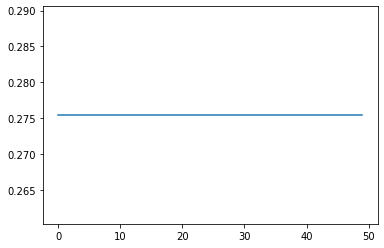

In [50]:
import random
import math
import matplotlib.pyplot as plt


nv = 1                           # number of variables
mm = 1                           # if minimization problem, mm = -1; if maximization problem, mm = 1
particle_size=20         # number of particles
iterations=50           # max number of iterations
w=0.85                    # inertia constant
c1=1                    # cognative constant
c2=0.5                     # social constant
# END OF THE CUSTOMIZATION SECTION
#------------------------------------------------------------------------------    

class Particle:
    def __init__(self,bounds):
        self.particle_position=[]                     # particle position
        self.particle_velocity=[]                     # particle velocity
        self.local_best_particle_position=[]          # best position of the particle
        self.fitness_local_best_particle_position= initial_fitness
        self.fitness_particle_position=initial_fitness

        for i in range(nv):
          self.particle_position.append(random.uniform(bounds [i][0],bounds [i][1])) 
          self.particle_velocity.append(random.uniform(-1,1))

    def evaluate(self,objective_function):
        self.fitness_particle_position=objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position                  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best

        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position                  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position

    def update_velocity(self,global_best_particle_position):
        for i in range(nv):
            r1=random.random()
            r2=random.random()
  
            cognitive_velocity = c1*r1*(self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2*r2*(global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w*self.particle_velocity[i]+ cognitive_velocity + social_velocity
  
    def update_position(self,bounds):
        for i in range(nv):
            self.particle_position[i]=self.particle_position[i]+self.particle_velocity[i]
  
            # check and repair to satisfy the upper bounds
            if self.particle_position[i]>bounds[i][1]:
                self.particle_position[i]=bounds[i][1]

            if self.particle_position[i] < bounds[i][0]:
            	self.particle_position[i]=bounds[i][0]              
class PSO():
    def __init__(self,objective_function,bounds,particle_size,iterations):
  
        fitness_global_best_particle_position=initial_fitness
        global_best_particle_position=[]
  
        swarm_particle=[]
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A=[]
          
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
                if mm == -1:
                  if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                    global_best_particle_position = list(swarm_particle[j].particle_position)
                    fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
                if mm == 1:
                  if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                    global_best_particle_position = list(swarm_particle[j].particle_position)
                    fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
            print("\n Iteration = ", i)
            print('Optimal solution:', global_best_particle_position)
            print('Objective function value:' , fitness_global_best_particle_position)
            for j in range(particle_size):
              swarm_particle[j].update_velocity(global_best_particle_position)
              swarm_particle[j].update_position(bounds)

            A.append(fitness_global_best_particle_position) 


        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:' , fitness_global_best_particle_position)
        print('Evolutionary process of the objective function value:')

        plt.plot(A)


initial_fitness = -float("inf") # for maximization problem
  
# Main PSO
PSO(objective_function, [[res.min(), res.max()]], particle_size, iterations)  

IG= 0.017017910649430368
IG= -0.0007054189474888783
IG= 0.03203894572099819
IG= 0.017619177933811292
IG= 0.2744108852108931
IG= 0.2744108852108931
IG= 0.017017910649430368
IG= 0.019326610445519643
IG= 0.03203894572099819
IG= 0.2744108852108931
IG= 0.019326610445519643
IG= 0.2744108852108931
IG= 0.04473414413164156
IG= 0.017017910649430368
IG= 0.03387621134772578
IG= -0.0007054189474888783
IG= 0.21792364875360337
IG= -0.0007054189474888783
IG= -0.0007054189474888783
IG= 0.2744108852108931

 Iteration =  0
Optimal solution: [39.98316072132259]
Objective function value: 0.2744108852108931
IG= -0.0007054189474888783
IG= -0.0007054189474888783
IG= 0.010797377279153864
IG= 0.0030129040551034603
IG= 0.2744108852108931
IG= 0.18630420504362566
IG= 0.019326610445519643
IG= -0.0007054189474888783
IG= 0.045667770673369246
IG= 0.2744108852108931
IG= -0.00020938962451189091
IG= 0.2744108852108931
IG= 0.18630420504362566
IG= -0.0007054189474888783
IG= 0.013175543097209141
IG= 0.21792364875360337
IG= 

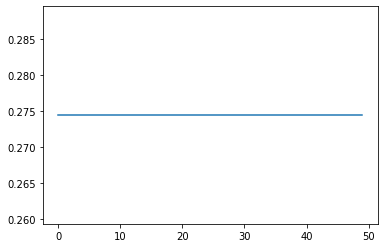

In [51]:

# THE FOLLOWING PARAMETERS ARE OPTINAL.
particle_size=20         # number of particles
iterations=50           # max number of iterations
w=0.85                    # inertia constant
c1=1                    # cognative constant
c2=0.5                     # social constant
# END OF THE CUSTOMIZATION SECTION
#------------------------------------------------------------------------------    

class Particle:
    def __init__(self,bounds):
        self.particle_position=[]                     # particle position
        self.particle_velocity=[]                     # particle velocity
        self.local_best_particle_position=[]          # best position of the particle
        self.fitness_local_best_particle_position= initial_fitness
        self.fitness_particle_position=initial_fitness

        for i in range(nv):
          self.particle_position.append(random.uniform(bounds [i][0],bounds [i][1])) 
          self.particle_velocity.append(random.uniform(-1,1))

    def evaluate(self,objective_function):
        self.fitness_particle_position=objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position                  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best

        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position                  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position

    def update_velocity(self,global_best_particle_position):
        for i in range(nv):
            r1=random.random()
            r2=random.random()
  
            cognitive_velocity = c1*r1*(self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2*r2*(global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w*self.particle_velocity[i]+ cognitive_velocity + social_velocity
  
    def update_position(self,bounds):
        for i in range(nv):
            self.particle_position[i]=self.particle_position[i]+self.particle_velocity[i]
  
            # check and repair to satisfy the upper bounds
            if self.particle_position[i]>bounds[i][1]:
                self.particle_position[i]=bounds[i][1]

            if self.particle_position[i] < bounds[i][0]:
            	self.particle_position[i]=bounds[i][0]              
class PSO():
    def __init__(self,objective_function,bounds,particle_size,iterations):
  
        fitness_global_best_particle_position=initial_fitness
        global_best_particle_position=[]
  
        swarm_particle=[]
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A=[]
          
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
                if mm == -1:
                  if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                    global_best_particle_position = list(swarm_particle[j].particle_position)
                    fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
                if mm == 1:
                  if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                    global_best_particle_position = list(swarm_particle[j].particle_position)
                    fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
            print("\n Iteration = ", i)
            print('Optimal solution:', global_best_particle_position)
            print('Objective function value:' , fitness_global_best_particle_position)
            for j in range(particle_size):
              swarm_particle[j].update_velocity(global_best_particle_position)
              swarm_particle[j].update_position(bounds)

            A.append(fitness_global_best_particle_position) 


        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:' , fitness_global_best_particle_position)
        print('Evolutionary process of the objective function value:')

        plt.plot(A)

#if mm == -1:
#	initial_fitness = float("inf") # for minimization problem
#if mm == 1:
initial_fitness = -float("inf") # for maximization problem
  
# Main PSO
PSO(objective_function, [[res.min(), res.max()]], particle_size, iterations)